<a href="https://colab.research.google.com/github/hafizauliarahman29/Capstone-Project-Data-Classification-Hacktiv8/blob/main/Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [18]:
#Load Dataset
df = pd.read_csv("churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [19]:
# Ambil fitur numerik yang relevan
X = df[['tenure', 'MonthlyCharges', 'TotalCharges', 'SeniorCitizen']]

In [21]:
from sklearn.preprocessing import StandardScaler
# Convert 'TotalCharges' to numeric, coercing errors to NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Drop rows with NaN values in the selected columns
df.dropna(subset=['tenure', 'MonthlyCharges', 'TotalCharges', 'SeniorCitizen'], inplace=True)

# Update X with the cleaned data
X = df[['tenure', 'MonthlyCharges', 'TotalCharges', 'SeniorCitizen']]

# Standarisasi
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

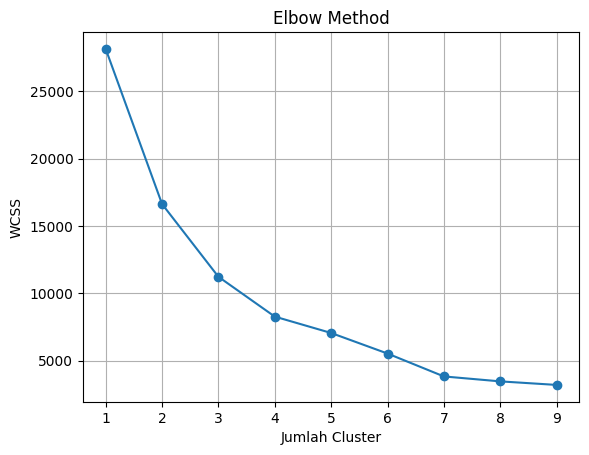

In [22]:
wcss = []  # within-cluster sum of square
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot elbow curve
plt.plot(range(1, 10), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Jumlah Cluster')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [23]:
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

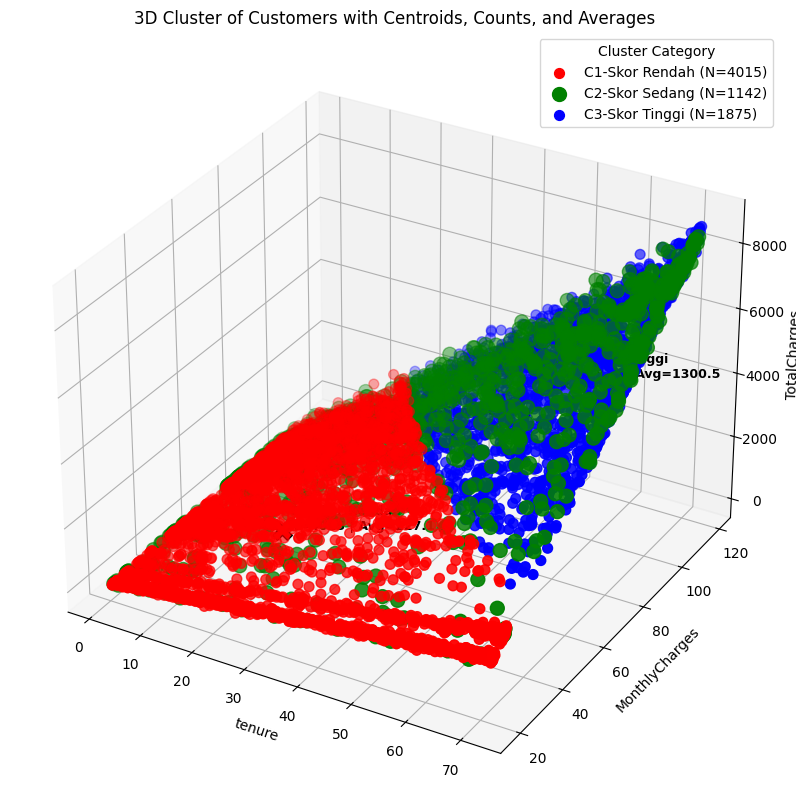

In [27]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 1. Hitung rata-rata skor gabungan per cluster
df['total_score'] = df[['tenure', 'MonthlyCharges', 'TotalCharges', 'SeniorCitizen']].mean(axis=1)
cluster_means = df.groupby('cluster')['total_score'].mean().sort_values()

# 2. Label & warna berdasarkan urutan skor
score_labels = ['C1-Skor Rendah', 'C2-Skor Sedang', 'C3-Skor Tinggi']
colors = ['r', 'g', 'b']

cluster_label_map = {
    cluster: score_labels[i]
    for i, cluster in enumerate(cluster_means.index)
}
color_map = {
    cluster: colors[i]
    for i, cluster in enumerate(cluster_means.index)
}

# 3. Buat plot 3D
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

for cluster in cluster_means.index:
    subset = df[df['cluster'] == cluster]

    # Gunakan SeniorCitizen sebagai ukuran titik
    ax.scatter(
        subset['tenure'],
        subset['MonthlyCharges'],
        subset['TotalCharges'],
        c=color_map[cluster],
        s=(subset['SeniorCitizen'] + 1) * 50,  # ukuran titik
        label=f"{cluster_label_map[cluster]} (N={len(subset)})"
    )

    # Hitung centroid
    centroid = subset[['tenure', 'MonthlyCharges', 'TotalCharges', 'SeniorCitizen']].mean()

    # Plot centroid
    ax.scatter(
        centroid['tenure'],
        centroid['MonthlyCharges'],
        centroid['TotalCharges'],
        c=color_map[cluster],
        marker='X',
        s=200,
        edgecolor='black'
    )

    # Teks label di dekat centroid
    avg_score = subset['total_score'].mean()
    student_count = len(subset)
    ax.text(
        centroid['tenure'] + 1,
        centroid['MonthlyCharges'] + 1,
        centroid['TotalCharges'] + 1,
        f"{cluster_label_map[cluster]}\nN={student_count} | Avg={avg_score:.1f}",
        fontsize=9,
        weight='bold'
    )

# Label sumbu
ax.set_xlabel('tenure')
ax.set_ylabel('MonthlyCharges')
ax.set_zlabel('TotalCharges')

# Judul dan legend
plt.title('3D Cluster of Customers with Centroids, Counts, and Averages')
ax.legend(title='Cluster Category')
plt.show()


In [28]:
df.groupby('cluster')[['tenure', 'MonthlyCharges', 'TotalCharges', 'SeniorCitizen']].mean().round(2)


,tenure,MonthlyCharges,TotalCharges,SeniorCitizen
cluster,,,,
0,57.24,88.63,5056.32,0.0
1,20.58,49.40,838.36,0.0
2,33.30,79.82,2810.47,1.0


In [30]:
from google.colab import files

df.to_csv("churn.csv", index=False)
files.download("churn.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>